# Continued fractions

In [1]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Calculate continued fraction rep
$(a_0,a_1,a_2,...)$

$$\frac{p}{q} = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 \cdots +\cfrac{1}{a_n}}}$$

In [2]:
def calc_cfrac(p,q):
    '''
    continued fraction representation of p/q
    '''
    quo_list = []
    rem = 1
    while rem != 0:
        (quo,rem) = divmod(p,q)
        quo_list.append(quo)
        p = q
        q = rem
    return quo_list 

In [3]:
cfrac = calc_cfrac(19,7)
print(cfrac)

[2, 1, 2, 2]


In [4]:
def expand_cfrac(a_list):
    res = a_list[-1]
    for a in a_list[:-1][::-1]:
        res = a + 1/res
    return res

In [5]:
cfrac = calc_cfrac(19,7)
expand_cfrac(cfrac)

2.7142857142857144

In [6]:
19/7

2.7142857142857144

## GCD

In [7]:

def gcd(a,b):
    if b > a:
        a,b = b,a
    if b == 0:
        return a
    else:
        return gcd(b,a%b)

In [8]:
gcd(10,25)

5

## Contruct triangle strip

In [86]:
# This code fails to give the right calculations if 1 in continued fraction representation

(7, 16)


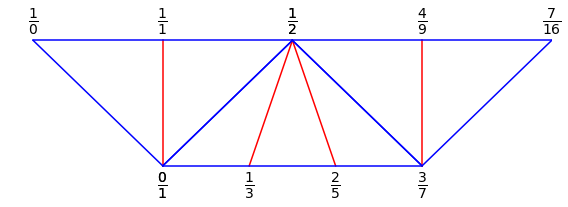

In [95]:
fig = plt.figure(figsize=(8,3))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

a_list = [0,2,3,2]
c_list = [(1,0)]
c_pivot = (a_list[0],1)
for i,a in enumerate(a_list[1:]):

    subdiv_x = np.linspace(1/a,1,a-1,endpoint=False)
    subdiv_y = 0
    if i % 2 == 0:
        x0 = i//2
        y0 = 0
        x1,y1 = x0+1,y0
        x2,y2 = x0 + 0.5,-1
        
        label = r"$\frac{{" + str(c_pivot[0]) + r"}}{{" + str(c_pivot[1]) + r"}}$" 
        ax.text(x2,y2-0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
        
        label = r"$\frac{{" + str(c_list[-1][0]) + r"}}{{" + str(c_list[-1][1]) + r"}}$" 
        ax.text(x0,y0+0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
        for j,x in enumerate(subdiv_x):
            plt.plot([x2,x+x0],[y2,subdiv_y],color='r')
            
            c1 = c_pivot
            c2 = c_list[-1]
            next_c = (c1[0] + c2[0],c1[1]+c2[1]) 
            c_list.append(next_c)
            if j == a - 2:
                c_pivot_old = c_pivot
                c_pivot = (c_list[-1][0] + c_pivot[0],c_list[-1][1] + c_pivot[1])  
                c_list = [c_pivot_old]
            label = r"$\frac{{" + str(next_c[0]) + r"}}{{" + str(next_c[1]) + r"}}$" 
            ax.text(x+x0,subdiv_y+0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
        if i == len(a_list[1:])-1:
            # final print c_pivot 
            print(c_pivot)
            label = r"$\frac{{" + str(c_pivot[0]) + r"}}{{" + str(c_pivot[1]) + r"}}$" 
            ax.text(x1,y1+0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
    else:
        x0 = 1 + i//2
        y0 = 0
        subdiv_y = -1
        x1,y1 = x0-0.5,-1
        x2,y2 = x0 + 0.5,-1
        label = r"$\frac{{" + str(c_pivot[0]) + r"}}{{" + str(c_pivot[1]) + r"}}$" 
        ax.text(x0,y0+0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
        
        label = r"$\frac{{" + str(c_list[-1][0]) + r"}}{{" + str(c_list[-1][1]) + r"}}$" 
        ax.text(x1,y1-0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
        for j,x in enumerate(subdiv_x):
            plt.plot([x0,x+x1],[y0,subdiv_y],color='r') 
            
            c1 = c_pivot
            c2 = c_list[-1]
            next_c = (c1[0] + c2[0],c1[1]+c2[1]) 
            c_list.append(next_c)
            if j == a - 2:
                c_pivot_old = c_pivot
                c_pivot = (c_list[-1][0] + c_pivot[0],c_list[-1][1] + c_pivot[1])  
                c_list = [c_pivot_old]
            label = r"$\frac{{" + str(next_c[0]) + r"}}{{" + str(next_c[1]) + r"}}$" 
            ax.text(x+x1,subdiv_y-0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
    
        if i == len(a_list[1:])-1:
            # final print c_pivot 
            print(c_pivot)
            label = r"$\frac{{" + str(c_pivot[0]) + r"}}{{" + str(c_pivot[1]) + r"}}$" 
            ax.text(x2,y2+0.15,label,horizontalalignment='center',verticalalignment='center',fontsize=20)
    plt.plot([x0,x1],[y0,y1],color='b')
    plt.plot([x1,x2],[y1,y2],color='b')
    plt.plot([x0,x2],[y0,y2],color='b')
    
plt.ylim([-1.1,0.1])
plt.xlim([-0.1,len(a_list[1:])-1])
plt.tight_layout()
plt.savefig("./saved_figs/farey_tri_strip.svg")